In [6]:
%pip install pandas matplotlib seaborn numpy scipy scikit-learn

  Using cached pandas-3.0.0-cp314-cp314-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.8-cp314-cp314-win_amd64.whl.metadata (52 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.4.2-cp314-cp314-win_amd64.whl.metadata (6.6 kB)
  Using cached scipy-1.17.0-cp314-cp314-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.9 MB 6.7 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.9 MB 6.7 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.9 MB 6.7 MB/s eta 0:00:01
   ---------------------- ----------------- 5.5/9.9 MB 6.7 MB/s eta 0:00:01
   ---------------------------- ----------- 7.1/9.9 MB 6.7 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.9 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.9 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 9

In [7]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df = pd.read_csv('./aus_vehicle_prices_cleaned.csv')

In [9]:
df = df.iloc[:, 1:]

In [10]:
df

,brand,year,model,used_or_new,transmission,drive_type,fuel_type,fuel_consumption,kilometres,cylinders,body_type,doors,seats,price,cylinder_capacity,exterior_clr,suburb,state
0,Hyundai,2015.0,Tucson,USED,Automatic,Front,Unleaded,7.9 L / 100 km,94377.0,4.0,SUV,4.0,5.0,23888.0,2.0,Grey,Mcgraths Hill,NSW
1,Hyundai,2020.0,Tucson,USED,Automatic,Front,Unleaded,7.9 L / 100 km,38341.0,4.0,SUV,4.0,5.0,28984.0,2.0,Blue,Granville,NSW
2,Hyundai,2019.0,Tucson,USED,Automatic,Front,Unleaded,7.9 L / 100 km,104066.0,4.0,SUV,4.0,5.0,26990.0,2.0,White,Singleton,NSW
3,Hyundai,2018.0,Tucson,USED,Automatic,Front,Unleaded,7.9 L / 100 km,88501.0,4.0,SUV,4.0,5.0,26495.0,2.0,Silver,Berwick,VIC
4,Hyundai,2019.0,Tucson,USED,Automatic,Front,Unleaded,7.9 L / 100 km,23126.0,4.0,SUV,4.0,5.0,34990.0,2.0,Black,Warwick Farm,NSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16665,BMW,2015.0,225I,USED,Automatic,Front,Premium,6.1 L / 100 km,46232.0,4.0,Hatchback,4.0,5.0,28990.0,2.0,Blue,Five Dock,NSW
16666,Kia,2014.0,RIO,USED,Manual,Front,Unleaded,5.6 L / 100 km,231137.0,4.0,Hatchback,3.0,5.0,10499.0,1.4,White,Ringwood,VIC
16667,Honda,1998.0,Civic,USED,Automatic,Front,Unleaded,8.4 L / 100 km,206276.0,4.0,Hatchback,3.0,5.0,7387.0,1.6,Silver,Ringwood,VIC
16668,Alfa,2014.0,Romeo,USED,Automatic,Front,Premium,5.5 L / 100 km,215977.0,4.0,Hatchback,3.0,5.0,8999.0,1.4,Grey,Laverton North,VIC


## Descriptive Anlaytics

### Distribution of brands

Toyota has the highest number of cars, almost twice as that of the next brand, Hyundai

In [11]:
import matplotlib.pyplot as plt

In [12]:
brand_count = df['brand'].value_counts()[:25]

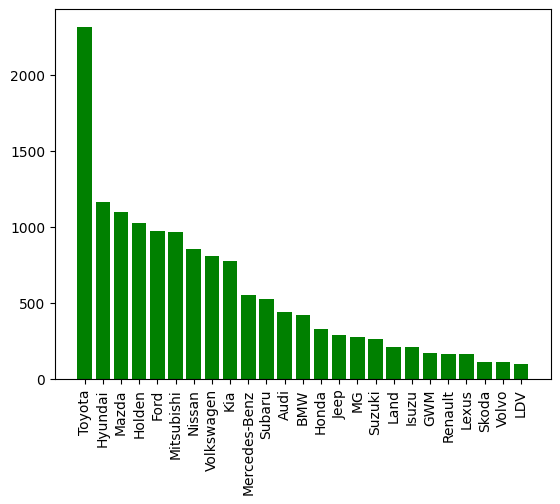

In [13]:
# Try a color pallette ?
plt.bar(x=brand_count.index, height = brand_count.values, color ='g' )
plt.xticks(rotation=90)
plt.show()

### Distribution of models

Toyota-Hilux, Ford-Ranger, Toyota - Landcruiser and Toyota-Corolla are the most common cars

In [7]:
model_concat = df['brand'] + ' - ' + df['model']

In [8]:
model = model_concat.value_counts()[:25]

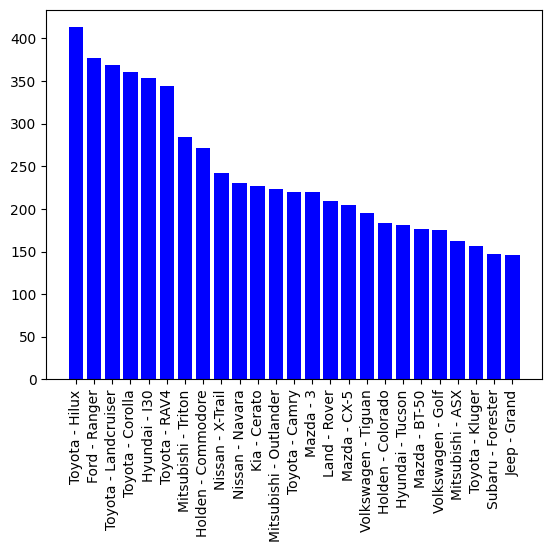

In [9]:
# Try a color pallette ?
plt.bar(x=model.index, height = model.values, color ='b' )
plt.xticks(rotation=90)
plt.show()

### Share of used/new cars

Mostly used cars in this dataset

In [14]:
used_or_new_count = df['used_or_new'].value_counts()
used_or_new_count

used_or_new
USED    13529
NEW      1057
DEMO      429
Name: count, dtype: int64

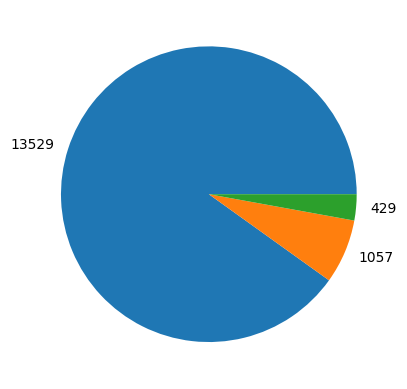

In [15]:
#TODO : Try a color pallette ?
plt.pie(used_or_new_count, labels = used_or_new_count )
plt.show()

### Distribution of Transmission types

In [16]:
df['transmission']

0        Automatic
1        Automatic
2        Automatic
3        Automatic
4        Automatic
           ...    
16665    Automatic
16666       Manual
16667    Automatic
16668    Automatic
16669       Manual
Name: transmission, Length: 16670, dtype: str

In [17]:
transmission_counts = df['transmission'].value_counts()
transmission_counts

transmission
Automatic    13190
Manual        1781
Name: count, dtype: int64

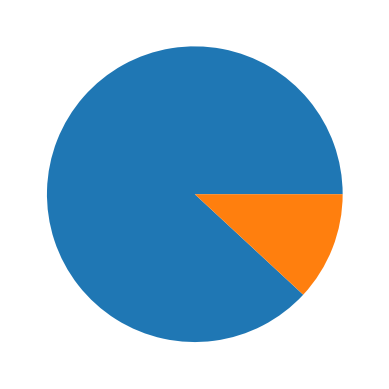

In [18]:
plt.pie(transmission_counts )
plt.show()

## Preprocessing

In [19]:
df


,brand,year,model,used_or_new,transmission,drive_type,fuel_type,fuel_consumption,kilometres,cylinders,body_type,doors,seats,price,cylinder_capacity,exterior_clr,suburb,state
0,Hyundai,2015.0,Tucson,USED,Automatic,Front,Unleaded,7.9 L / 100 km,94377.0,4.0,SUV,4.0,5.0,23888.0,2.0,Grey,Mcgraths Hill,NSW
1,Hyundai,2020.0,Tucson,USED,Automatic,Front,Unleaded,7.9 L / 100 km,38341.0,4.0,SUV,4.0,5.0,28984.0,2.0,Blue,Granville,NSW
2,Hyundai,2019.0,Tucson,USED,Automatic,Front,Unleaded,7.9 L / 100 km,104066.0,4.0,SUV,4.0,5.0,26990.0,2.0,White,Singleton,NSW
3,Hyundai,2018.0,Tucson,USED,Automatic,Front,Unleaded,7.9 L / 100 km,88501.0,4.0,SUV,4.0,5.0,26495.0,2.0,Silver,Berwick,VIC
4,Hyundai,2019.0,Tucson,USED,Automatic,Front,Unleaded,7.9 L / 100 km,23126.0,4.0,SUV,4.0,5.0,34990.0,2.0,Black,Warwick Farm,NSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16665,BMW,2015.0,225I,USED,Automatic,Front,Premium,6.1 L / 100 km,46232.0,4.0,Hatchback,4.0,5.0,28990.0,2.0,Blue,Five Dock,NSW
16666,Kia,2014.0,RIO,USED,Manual,Front,Unleaded,5.6 L / 100 km,231137.0,4.0,Hatchback,3.0,5.0,10499.0,1.4,White,Ringwood,VIC
16667,Honda,1998.0,Civic,USED,Automatic,Front,Unleaded,8.4 L / 100 km,206276.0,4.0,Hatchback,3.0,5.0,7387.0,1.6,Silver,Ringwood,VIC
16668,Alfa,2014.0,Romeo,USED,Automatic,Front,Premium,5.5 L / 100 km,215977.0,4.0,Hatchback,3.0,5.0,8999.0,1.4,Grey,Laverton North,VIC


In [20]:
df.dtypes

brand                    str
year                 float64
model                    str
used_or_new              str
transmission             str
drive_type               str
fuel_type                str
fuel_consumption         str
kilometres           float64
cylinders            float64
body_type                str
doors                float64
seats                float64
price                float64
cylinder_capacity    float64
exterior_clr             str
suburb                   str
state                    str
dtype: object

In [21]:
numeric_features = ['year', 'kilometres', 'cylinders', 'doors', 'seats', 'price', 'cylinder_capacity']

### Fuel consumtion column

In [22]:
fuel_cons_regex_bool_series = df['fuel_consumption'].str.fullmatch(r'(\d+(?:\.\d+)?)\s*L\s*/\s*100\s*km')

In [23]:
fuel_cons_regex_bool_series

0        True
1        True
2        True
3        True
4        True
         ... 
16665    True
16666    True
16667    True
16668    True
16669    True
Name: fuel_consumption, Length: 16670, dtype: bool

In [24]:
fuel_cons_regex_bool_series[fuel_cons_regex_bool_series == 'True' ]

Series([], Name: fuel_consumption, dtype: bool)

In [25]:
pattern_conforming_boolean = df['fuel_consumption'].str.fullmatch(r'(\d+(?:\.\d+)?)\s*L\s*/\s*100\s*km').astype('bool')
df['fuel_consumption'].str.fullmatch(r'(\d+(?:\.\d+)?)\s*L\s*/\s*100\s*km').equals(pattern_conforming_boolean)

True

In [26]:
df['fuel_consumption'] = df['fuel_consumption'].str.extract(r'(\d+(?:\.\d+)?)')

In [27]:
df

,brand,year,model,used_or_new,transmission,drive_type,fuel_type,fuel_consumption,kilometres,cylinders,body_type,doors,seats,price,cylinder_capacity,exterior_clr,suburb,state
0,Hyundai,2015.0,Tucson,USED,Automatic,Front,Unleaded,7.9,94377.0,4.0,SUV,4.0,5.0,23888.0,2.0,Grey,Mcgraths Hill,NSW
1,Hyundai,2020.0,Tucson,USED,Automatic,Front,Unleaded,7.9,38341.0,4.0,SUV,4.0,5.0,28984.0,2.0,Blue,Granville,NSW
2,Hyundai,2019.0,Tucson,USED,Automatic,Front,Unleaded,7.9,104066.0,4.0,SUV,4.0,5.0,26990.0,2.0,White,Singleton,NSW
3,Hyundai,2018.0,Tucson,USED,Automatic,Front,Unleaded,7.9,88501.0,4.0,SUV,4.0,5.0,26495.0,2.0,Silver,Berwick,VIC
4,Hyundai,2019.0,Tucson,USED,Automatic,Front,Unleaded,7.9,23126.0,4.0,SUV,4.0,5.0,34990.0,2.0,Black,Warwick Farm,NSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16665,BMW,2015.0,225I,USED,Automatic,Front,Premium,6.1,46232.0,4.0,Hatchback,4.0,5.0,28990.0,2.0,Blue,Five Dock,NSW
16666,Kia,2014.0,RIO,USED,Manual,Front,Unleaded,5.6,231137.0,4.0,Hatchback,3.0,5.0,10499.0,1.4,White,Ringwood,VIC
16667,Honda,1998.0,Civic,USED,Automatic,Front,Unleaded,8.4,206276.0,4.0,Hatchback,3.0,5.0,7387.0,1.6,Silver,Ringwood,VIC
16668,Alfa,2014.0,Romeo,USED,Automatic,Front,Premium,5.5,215977.0,4.0,Hatchback,3.0,5.0,8999.0,1.4,Grey,Laverton North,VIC


## Exploratory Data Analysis

<Figure size 200x200 with 0 Axes>

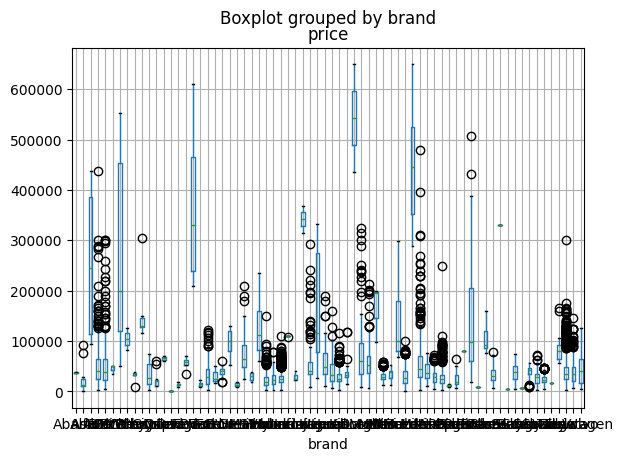

In [28]:


plt.figure(figsize=(2,2))
df.boxplot(column='price', by='brand')
plt.show()

## Model Building

### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [30]:
numeric_df = df.select_dtypes(include=['number'])

In [31]:
numeric_df

,year,kilometres,cylinders,doors,seats,price,cylinder_capacity
0,2015.0,94377.0,4.0,4.0,5.0,23888.0,2.0
1,2020.0,38341.0,4.0,4.0,5.0,28984.0,2.0
2,2019.0,104066.0,4.0,4.0,5.0,26990.0,2.0
3,2018.0,88501.0,4.0,4.0,5.0,26495.0,2.0
4,2019.0,23126.0,4.0,4.0,5.0,34990.0,2.0
...,...,...,...,...,...,...,...
16665,2015.0,46232.0,4.0,4.0,5.0,28990.0,2.0
16666,2014.0,231137.0,4.0,3.0,5.0,10499.0,1.4
16667,1998.0,206276.0,4.0,3.0,5.0,7387.0,1.6
16668,2014.0,215977.0,4.0,3.0,5.0,8999.0,1.4


In [32]:
numeric_df = numeric_df.dropna()

In [33]:
X = numeric_df.loc[:,['year', 'kilometres', 'cylinders', 'doors', 'seats', 'cylinder_capacity']]
y = numeric_df['price']

In [34]:
y

0        23888.0
1        28984.0
2        26990.0
3        26495.0
4        34990.0
          ...   
16665    28990.0
16666    10499.0
16667     7387.0
16668     8999.0
16669    11990.0
Name: price, Length: 14878, dtype: float64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 0)

In [36]:
rf_classifier = RandomForestClassifier(max_depth=2, random_state=0)
rf_classifier.fit(X, y)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",2
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [37]:
y_pred = rf_classifier.predict(X_test)
y_pred

array([29990., 29990., 29990., ..., 29990., 12990., 12990.], shape=(4464,))

In [38]:
accuracy_score(y_test, y_pred)

0.025761648745519714